### Mini batch Task
- 다이아몬드의 특성을 회귀 분석하여, 예상 가격을 예측한다.

### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value): 해당 독립 변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미하다라는 것을 뜻한다.
- Durbin-Watson: 보통 1.5에서 2.5 사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sup>2</sup>값을 유지 또는 개선하는 방향으로만 수행해야 한다.

### VIF (Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src="./images/multicollinearity.png">`

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
pre_d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
pre_d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [4]:
pre_d_df.color.value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [5]:
pre_d_df.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

columns = ['cut', 'clarity']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders

{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

In [7]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43


In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_d_df[['color']])

pre_d_df = pd.concat([pre_d_df,
                     pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)],
                    axis=1)

pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [9]:
pre_d_df = pre_d_df.drop(labels=['color'], axis=1)
pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [10]:
pre_d_df.columns = ['carat',
                   'cut',
                   'clarity',
                   'depth',
                   'table',
                   'price',
                   'x', 'y', 'z',
                   'D', 'E', 'F', 'G', 'H', 'I', 'J']

pre_d_df

,carat,cut,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,0.23,2,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>]],
      dtype=object)

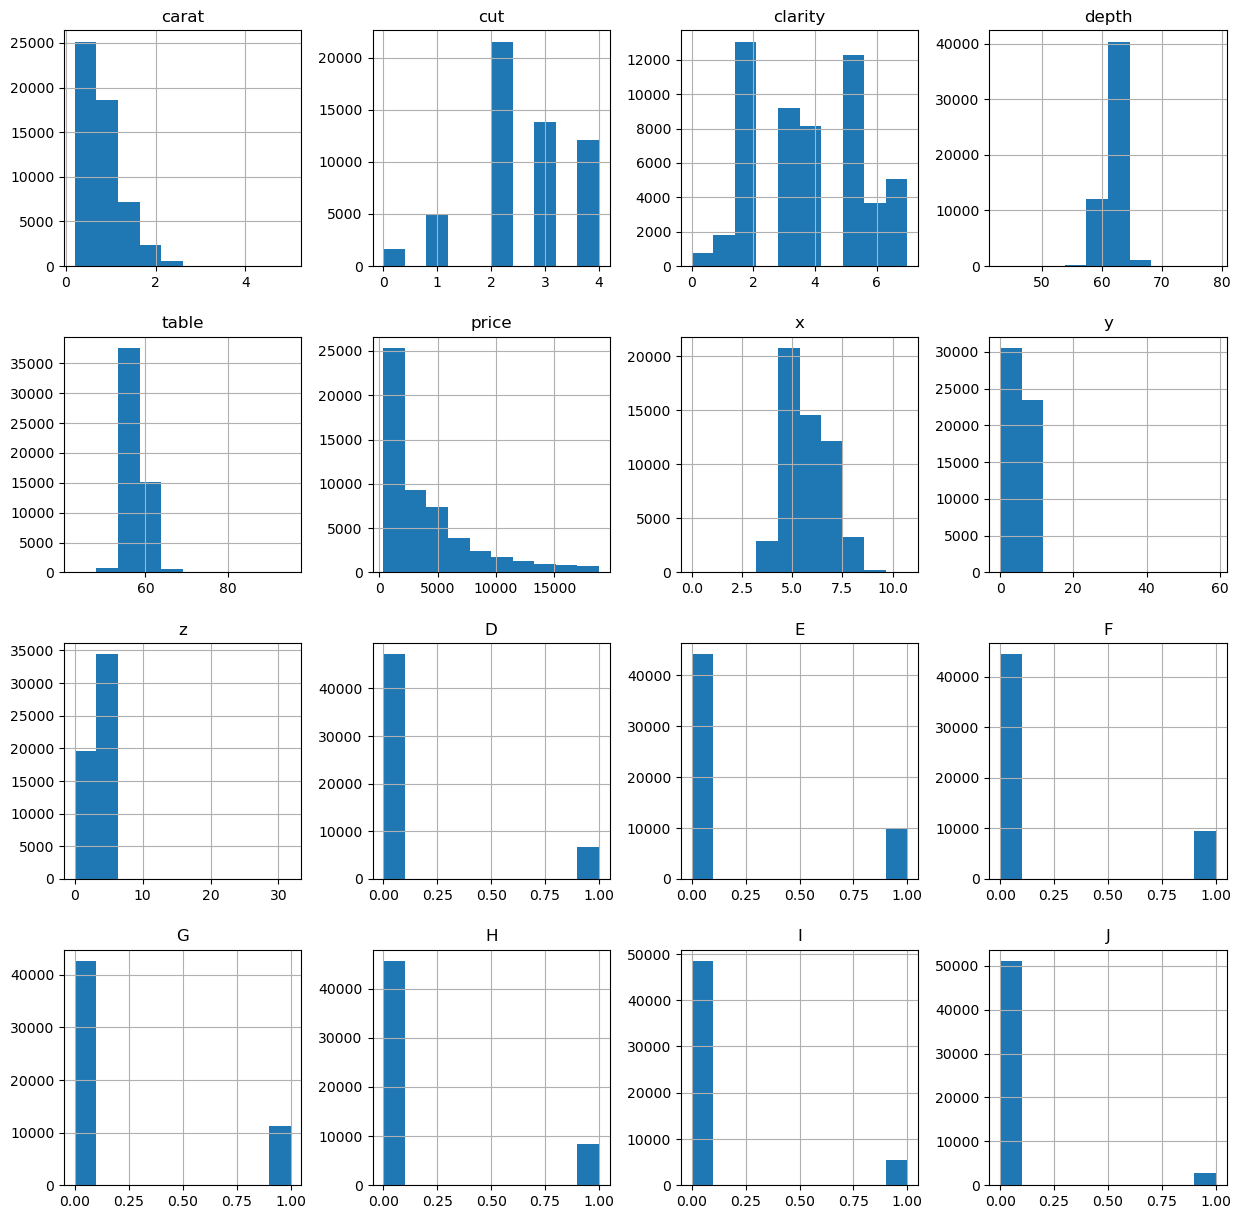

In [11]:
pre_d_df.hist(figsize=(15, 15))

<Axes: >

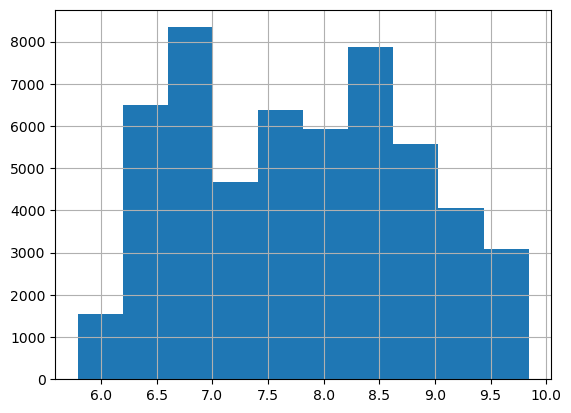

In [12]:
# 타겟 데이터인 price의 분포를 정규 분포로 맞추기
np.log1p(pre_d_df['price']).hist()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>]],
      dtype=object)

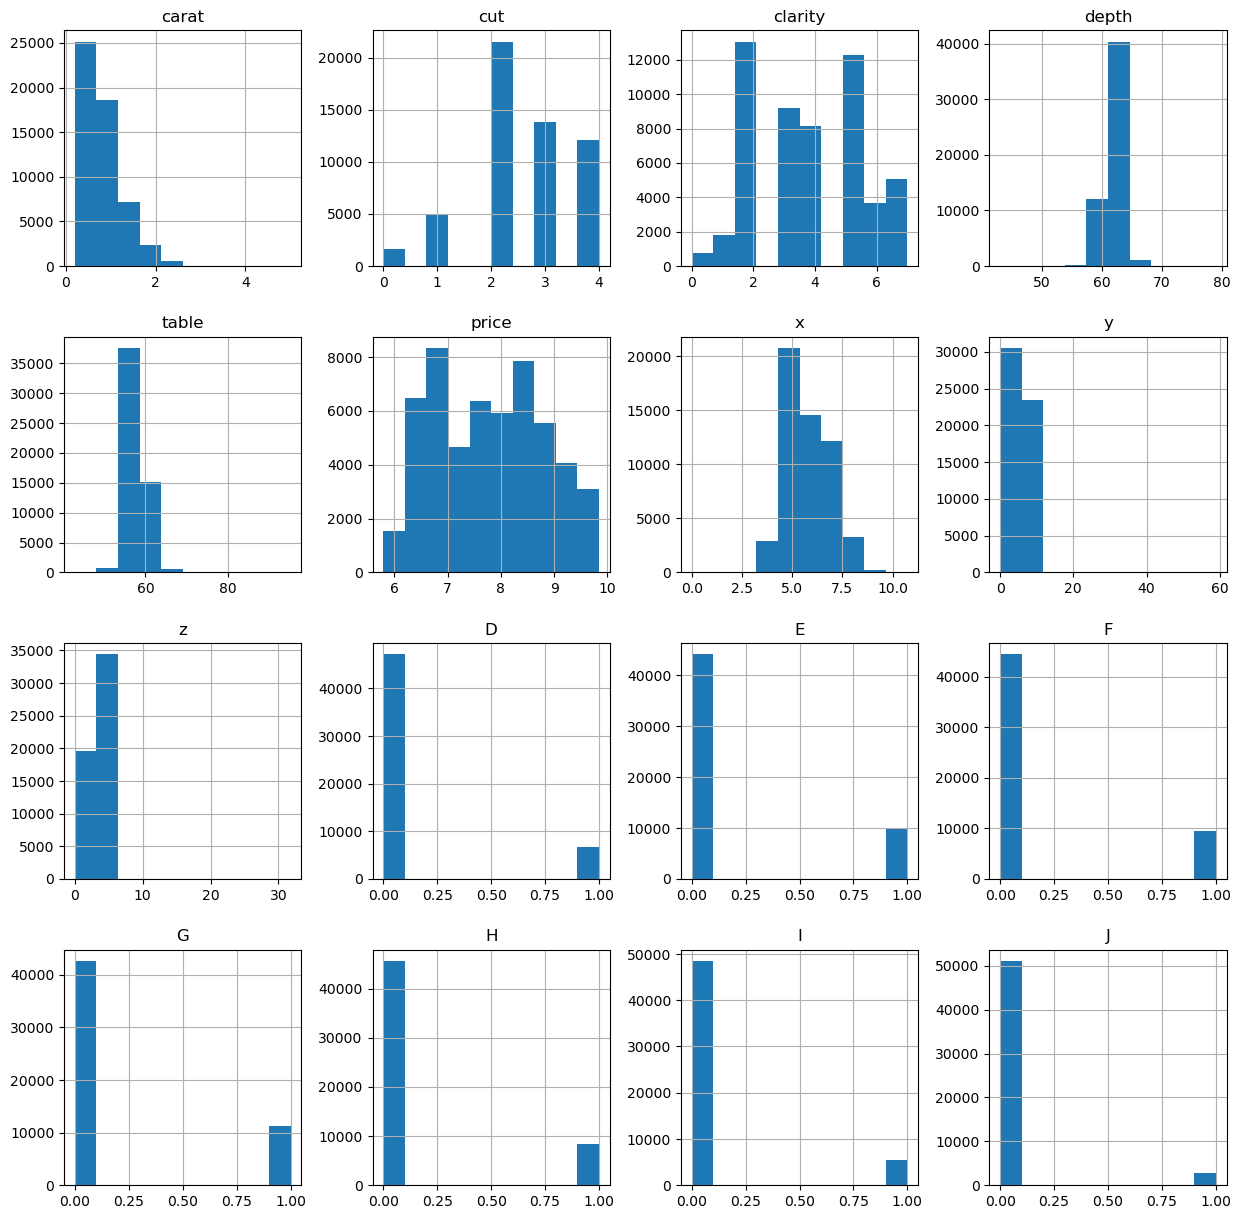

In [13]:
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df['price'])
pre_d_df.hist(figsize=(15, 15))

In [14]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

x          0.958027
y          0.936190
z          0.935233
carat      0.920252
table      0.158203
J          0.082972
I          0.077838
H          0.055371
cut        0.022905
G          0.001424
depth      0.000852
F         -0.011124
D         -0.063466
E         -0.096278
clarity   -0.120026
Name: price, dtype: float64

In [15]:
columns = ['x', 'y', 'z', 'carat', 'price']
pre_d_df = pre_d_df.loc[:, columns]
pre_d_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
53938,6.15,6.12,3.74,0.86,7.922261
53939,5.83,5.87,3.64,0.75,7.922261
53940,5.79,5.74,3.49,0.71,7.921898
53941,5.74,5.73,3.43,0.71,7.921898


In [17]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True)

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/432, W1: 0.2605, W2: 0.6678, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.0979
Epoch: 100/1000, Batch: 2/432, W1: 0.2605, W2: 0.6678, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.1228
Epoch: 100/1000, Batch: 3/432, W1: 0.2605, W2: 0.6678, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.1049
Epoch: 100/1000, Batch: 4/432, W1: 0.2605, W2: 0.6678, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.1031
Epoch: 100/1000, Batch: 5/432, W1: 0.2606, W2: 0.6679, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.0839
Epoch: 100/1000, Batch: 6/432, W1: 0.2606, W2: 0.6679, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.1294
Epoch: 100/1000, Batch: 7/432, W1: 0.2606, W2: 0.6679, W3: 0.6834, W4: -0.7797, b: 0.6314
loss: 0.0836
Epoch: 100/1000, Batch: 8/432, W1: 0.2607, W2: 0.668, W3: 0.6835, W4: -0.7797, b: 0.6315
loss: 0.0819
Epoch: 100/1000, Batch: 9/432, W1: 0.2607, W2: 0.668, W3: 0.6835, W4: -0.7797, b: 0.6315
loss: 0.0877
Epoch: 100/1000, Batch: 10/432, W1: 0.2607, W2: 0.668, W3: 0.6835, W4: -0.7

In [24]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}'\
          .format(MSE, RMSE))

In [ ]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [25]:
get_evaluation(y_test, prediction)

MSE: 0.1603, RMSE: 0.4004
